# Analyze an example data set

In [2]:
# Load modules we'll need.
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

## Load the data and look at it.

**Q.** Do the data from the two electrodes appear related?

### Conclusions

* Plotting the means of both datasets - they look very similar
* But when we plot both means together they look very different

In [3]:
# Load the data.
data = loadmat('ECoG-1.mat')  # Load the data,
E1 = data['E1']               # ... from the first electrode,
E2 = data['E2']               # ... and from the second electrode.
t = data['t'][0]              # Load the time axis
K = np.size(E1,0)             # Store number of trials.
N = np.size(E1,1)             # Store number of observations.
dt = t[1]-t[0]                # Store sampling interval.

Text(0.5, 1.0, 'E1')

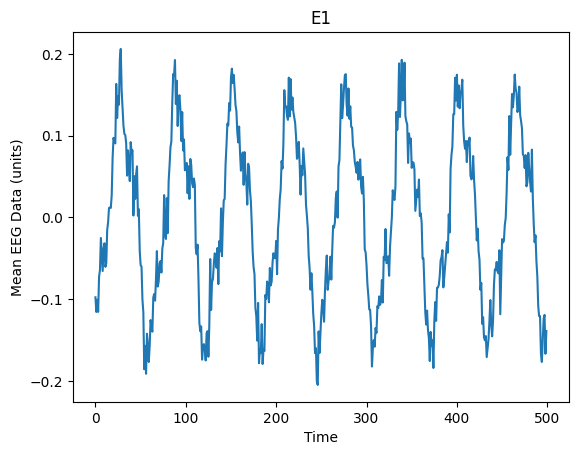

In [4]:
E1_mean = np.mean(E1,0)
plt.figure()
plt.plot(E1_mean)
plt.ylabel('Mean EEG Data (units)')
plt.xlabel('Time')
plt.title('E1')

Text(0.5, 1.0, 'E2')

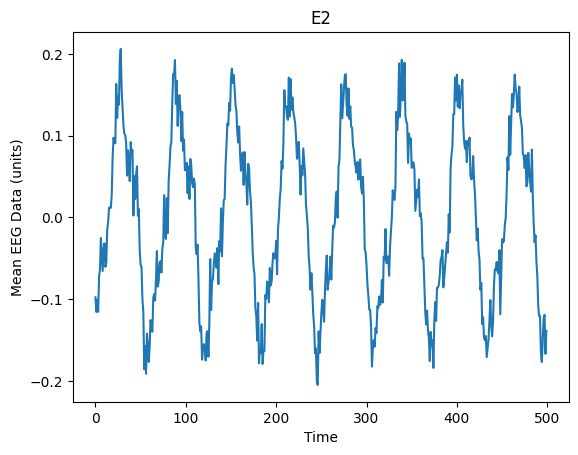

In [5]:
E2_mean = np.mean(E2,0)
plt.figure()
plt.plot(E1_mean)
plt.ylabel('Mean EEG Data (units)')
plt.xlabel('Time')
plt.title('E2')

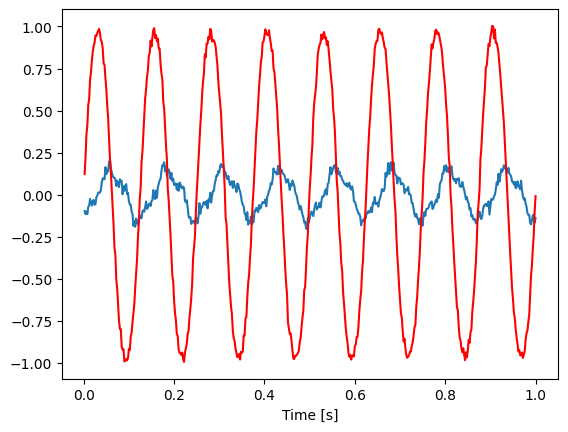

In [26]:
plt.plot(t,E1_mean)
plt.plot(t,E2_mean, 'r')
plt.xlabel('Time [s]');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


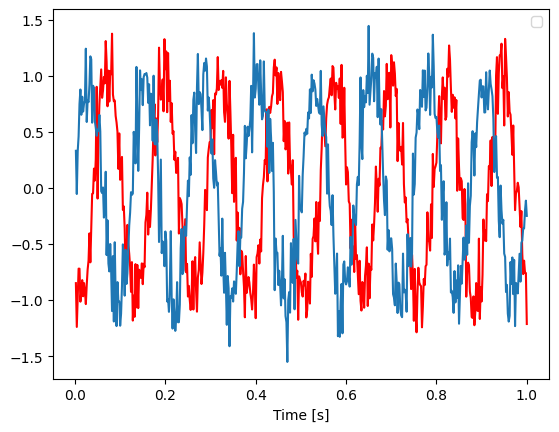

In [21]:
plt.plot(t,E1[0,:], 'r')
plt.plot(t,E2[0,:])
plt.xlabel('Time [s]');
plt.show()

One trial from each electrode overlapped - E1 trial in red, E2 trial in blue.

* Similar amplitudes 
* low frequency dominant 
* IF plotted using the analysis code from the textbook - you can plot multiple trials over a longer time period and get similar looking graphs (shifted from trial to trial).
* Average of E1 and average of E2 graph (averaging across trials): we see that E2 is more "in phase" than E2 - E2 is more in phase across trials. E1 is lined up across trials - E2 has the largest difference? look at the spectrogram
* probably not coupled

## Compute the (auto-)spectrum for each electrode, for a single trial.

**Q.** What do you find? What rhythms are present in the single trial data?

**Q.** How else can you visualize the spectrum?

### Conclusions

* Ploting the autospectrum of one trial from each electrode individual doesn't reveal much differences - the plots look very similar.
* 

In [12]:
dt = t[1] - t[0]
print('The sampling interval is', dt)

#sampling frequency
f0 = 1/dt

#number of points in the data (N)
N_E1 = np.size(E1)
N_E2 = np.size(E2)

# What is the total time of the observation (T)?
T_E1 = N * dt
T_E2 = N * dt

fNQ = f0/2
df_E1 = 1/T_E1
df_E2 = 1/T_E2

The sampling interval is 0.002


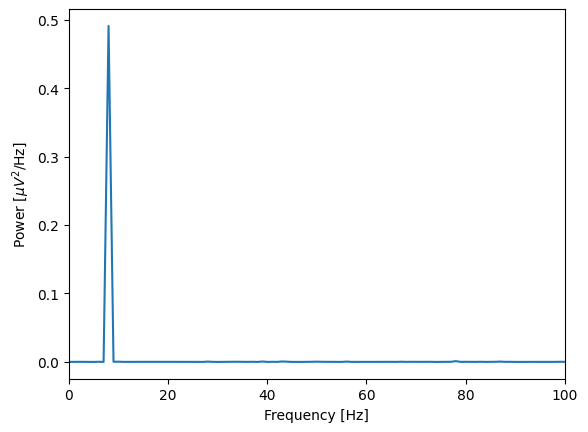

In [15]:
#Autospectra for one trial of E1
#frequency axis
fj  = np.arange(0,fNQ,df_E1)

x = E1[0,:]
X = np.ndarray(np.size(fj), complex);
for j in range( np.size(fj) ):
    X[j] = np.sum(x * np.exp(-2 * np.pi * 1j * fj[j] * t)) #1j is the square root of -1; replaces i in our Xj formula 

# And the spectrum,
Sxx = 2*dt**2/T_E1 * X * np.conj(X) #Sxx at frequency index j 

# Plot
plt.plot(fj, Sxx.real)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                
plt.ylabel('Power [$\mu V^2$/Hz]');
plt.show()

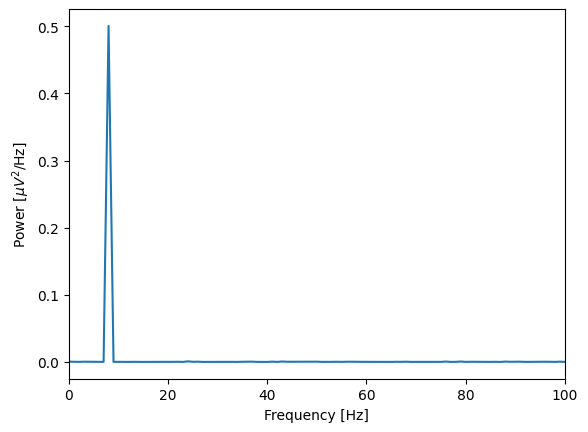

In [16]:
#Autospectra for one trial of E2
#frequency axis
fj  = np.arange(0,fNQ,df_E1)

x = E2[0,:]
X = np.ndarray(np.size(fj), complex);
for j in range( np.size(fj) ):
    X[j] = np.sum(x * np.exp(-2 * np.pi * 1j * fj[j] * t)) #1j is the square root of -1; replaces i in our Xj formula 

# And the spectrum,
Sxx = 2*dt**2/T_E2 * X * np.conj(X) #Sxx at frequency index j 

# Plot
plt.plot(fj, Sxx.real)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                
plt.ylabel('Power [$\mu V^2$/Hz]');
plt.show()

In [22]:
faxis1 = np.arange(0,fNQ,df_E1)
faxis2 = np.arange(0,fNQ,df_E2)

c:\Users\Gabrielle\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


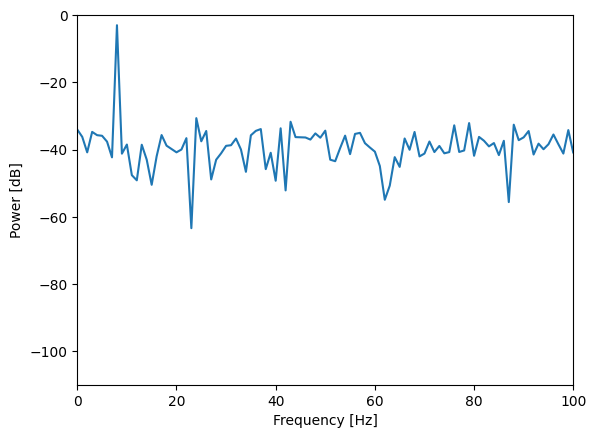

In [24]:
plt.figure()
plt.plot(faxis1, 10*np.log10(Sxx))   # Plot the spectrum in decibels.
plt.xlim([0, 100])                               # Select the frequency range.
plt.ylim([-110, 0])                               # Select the decibel range.
plt.xlabel('Frequency [Hz]')                     # Label the axes.
plt.ylabel('Power [dB]');

c:\Users\Gabrielle\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


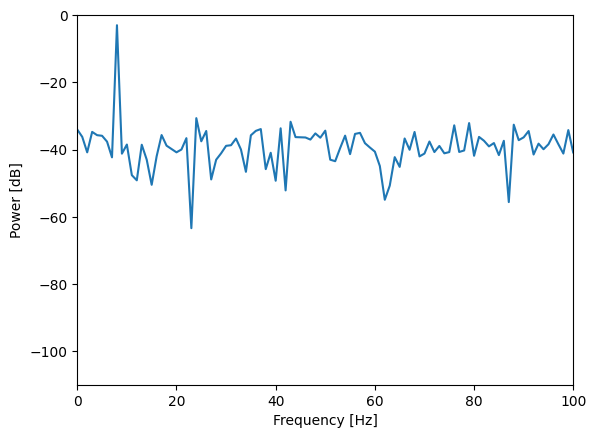

In [25]:
plt.figure()
plt.plot(faxis2, 10*np.log10(Sxx))   # Plot the spectrum in decibels.
plt.xlim([0, 100])                               # Select the frequency range.
plt.ylim([-110, 0])                               # Select the decibel range.
plt.xlabel('Frequency [Hz]')                     # Label the axes.
plt.ylabel('Power [dB]');

![Alt text](image.png)

## Compute the trial-averaged (auto-)spectrum for each electrode.

**Q.** Now what do you find? What rhythms are present in the data?

**Q.** How else can you visualize the spectrum?

### Conclusions

* 
* 

In [ ]:
for x in range(E1)
    

## Compute the cross-covariance for the *first trial*.

**Q.** What do you find? Are the data from the two electrodes "coupled" for the first trial?

### Conclusions

* 
* 

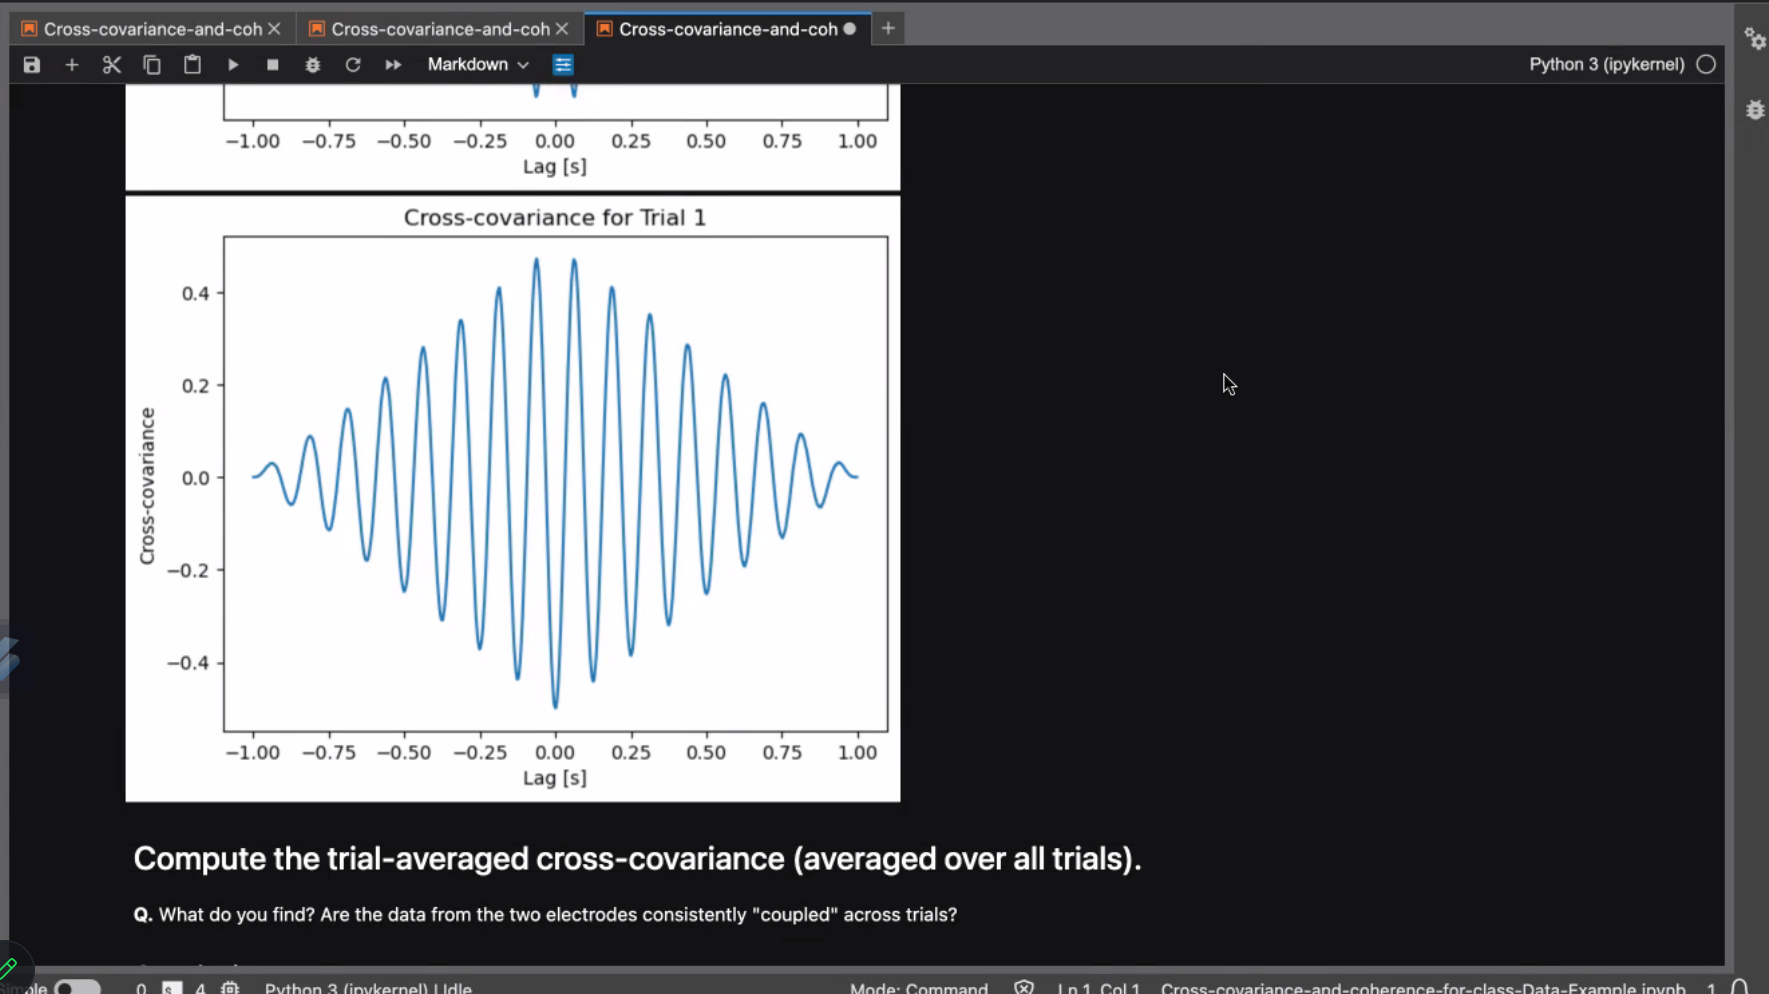

## Compute the trial-averaged cross-covariance (averaged over all trials).

**Q.** What do you find? Are the data from the two electrodes consistently "coupled" across trials?

### Conclusions

* 
* 

## Compute the coherence between the two electrodes

**Q.** What do you find? Is there evidence of coherence between the two electrodes?

**Q.** How do the coherence results compare to the spectral results?

### Conclusions

* 
* 

## Visualizing the phase difference across trials

**Q.** What do you find? Which frequency has the more consistent phase difference across trials?

### Conclusions

* 
* 

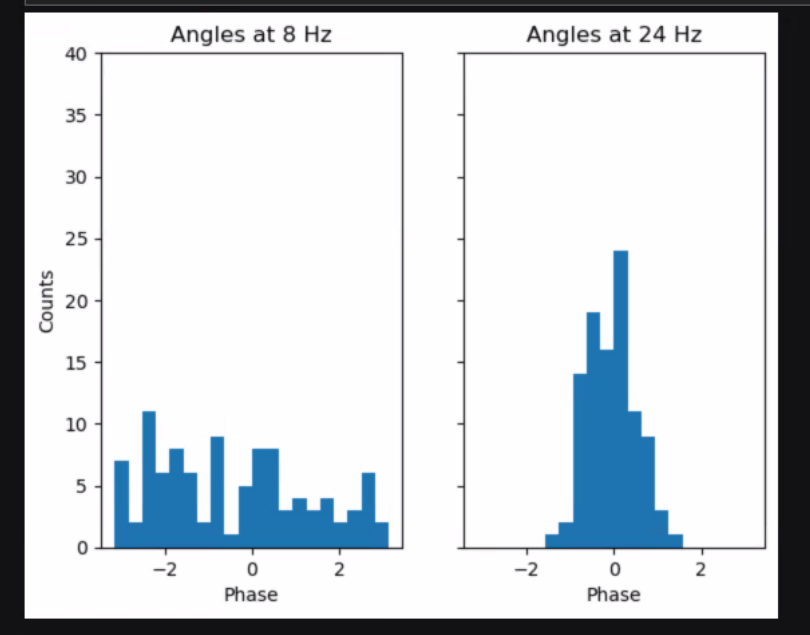